<a href="https://colab.research.google.com/github/AcheMQ/Proyecto-Final/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn as skl
from pandas import set_option
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
url="/content/Stars.csv"
dataframe=pd.read_csv(url)
print(dataframe)

     Temperature              L          R    A_M  Color Spectral_Class  Type
0           3068       0.002400     0.1700  16.12    Red              M     0
1           3042       0.000500     0.1542  16.60    Red              M     0
2           2600       0.000300     0.1020  18.70    Red              M     0
3           2800       0.000200     0.1600  16.65    Red              M     0
4           1939       0.000138     0.1030  20.06    Red              M     0
..           ...            ...        ...    ...    ...            ...   ...
235        38940  374830.000000  1356.0000  -9.93   Blue              O     5
236        30839  834042.000000  1194.0000 -10.63   Blue              O     5
237         8829  537493.000000  1423.0000 -10.73  White              A     5
238         9235  404940.000000  1112.0000 -11.23  White              A     5
239        37882  294903.000000  1783.0000  -7.80   Blue              O     5

[240 rows x 7 columns]


In [ ]:
print(dataframe.describe())

        Temperature              L            R         A_M        Type
count    240.000000     240.000000   240.000000  240.000000  240.000000
mean   10497.462500  107188.361635   237.157781    4.382396    2.500000
std     9552.425037  179432.244940   517.155763   10.532512    1.711394
min     1939.000000       0.000080     0.008400  -11.920000    0.000000
25%     3344.250000       0.000865     0.102750   -6.232500    1.000000
50%     5776.000000       0.070500     0.762500    8.313000    2.500000
75%    15055.500000  198050.000000    42.750000   13.697500    4.000000
max    40000.000000  849420.000000  1948.500000   20.060000    5.000000


In [ ]:
#Limpiando el datasets,eliminamos las instancias con valores nulos
dataframe = dataframe.dropna()


In [ ]:
dataset=dataframe.copy()

In [ ]:
dataset

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [ ]:
#Seleccionando los atributos de texto del dataset

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
#dataset["Color"]=ordinal_encoder.fit_transform(dataset[["Color"]])
dataset["Spectral_Class"]=ordinal_encoder.fit_transform(dataset[["Spectral_Class"]])

In [ ]:
dataset

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,5.0,0
1,3042,0.000500,0.1542,16.60,Red,5.0,0
2,2600,0.000300,0.1020,18.70,Red,5.0,0
3,2800,0.000200,0.1600,16.65,Red,5.0,0
4,1939,0.000138,0.1030,20.06,Red,5.0,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,6.0,5
236,30839,834042.000000,1194.0000,-10.63,Blue,6.0,5
237,8829,537493.000000,1423.0000,-10.73,White,0.0,5
238,9235,404940.000000,1112.0000,-11.23,White,0.0,5


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    float64
 6   Type            240 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 15.0+ KB


In [ ]:
#correlación 
set_option('display.width', 100)
correlations = dataset.corr(method='pearson')
print(correlations)

                Temperature         L         R       A_M  Spectral_Class      Type
Temperature        1.000000  0.393404  0.064216 -0.420261       -0.207852  0.411129
L                  0.393404  1.000000  0.526516 -0.692619        0.275280  0.676845
R                  0.064216  0.526516  1.000000 -0.608728        0.097124  0.660975
A_M               -0.420261 -0.692619 -0.608728  1.000000       -0.085840 -0.955276
Spectral_Class    -0.207852  0.275280  0.097124 -0.085840        1.000000 -0.049131
Type               0.411129  0.676845  0.660975 -0.955276       -0.049131  1.000000


In [ ]:
#sesgo
skew = dataset.skew()
print(skew)

Temperature       1.321568
L                 2.068069
R                 1.946800
A_M              -0.121540
Spectral_Class   -0.648746
Type              0.000000
dtype: float64


<ipython-input-119-32b6dedb0900>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew = dataset.skew()


In [ ]:
dataset=dataset.astype({"Temperature":"float64"})

In [ ]:
for i in dataset["Color"]:
  if len(dataset.index[dataset["Color"]==i].tolist())==1:
    dataset.drop(dataset.index[dataset["Color"]==i].tolist(),axis=0,inplace=True)
dataset=dataset.dropna()

In [ ]:
# se dividen los atributos predictores del atributo a predecir, y eliminemos los valores perdidos
X = dataset.loc[:,["Temperature","L","R","A_M","Type","Spectral_Class"]]
y = dataset['Color']

In [ ]:
dataset["Color"].value_counts()

Red                112
Blue                56
Blue-white          26
Blue White          10
yellow-white         8
White                7
Blue white           4
Yellowish White      3
white                3
Whitish              2
Orange               2
yellowish            2
Name: Color, dtype: int64

In [ ]:
#se dividen los datos los datos en dos partes, uno para entrenar y otro para estimar su calidad
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
train_idx, test_idx = next(sss.split(X, y))
X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

In [ ]:
X_train.merge(y_train, left_index=True, right_index=True)

,Temperature,L,R,A_M,Type,Spectral_Class,Color
219,8250.0,9.25000,1.93000,-0.980,3,2.0,yellow-white
94,9030.0,45.00000,2.63000,1.450,3,0.0,Blue-white
87,10980.0,0.00074,0.00870,11.190,2,1.0,Blue White
142,18290.0,0.00130,0.00934,12.780,2,1.0,Blue
12,3134.0,0.00040,0.19600,13.210,1,5.0,Red
...,...,...,...,...,...,...,...
47,3574.0,200000.00000,89.00000,-5.240,4,5.0,Red
61,3432.0,0.00067,0.19000,16.940,0,5.0,Red
106,24630.0,363000.00000,63.00000,-5.830,4,6.0,Blue
229,21738.0,748890.00000,92.00000,-7.346,4,6.0,Blue


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     235 non-null    float64
 1   L               235 non-null    float64
 2   R               235 non-null    float64
 3   A_M             235 non-null    float64
 4   Color           235 non-null    object 
 5   Spectral_Class  235 non-null    float64
 6   Type            235 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.7+ KB


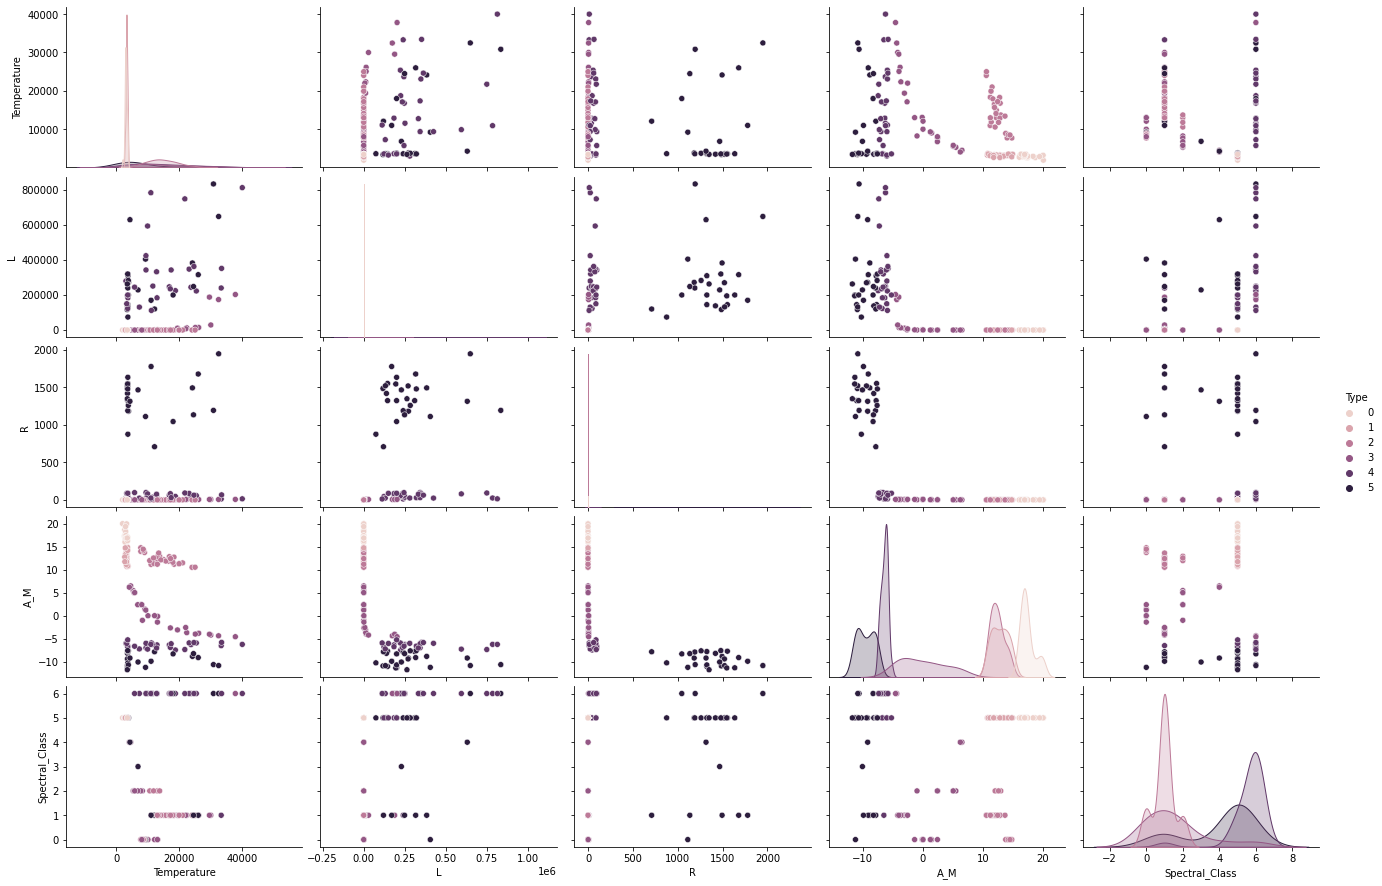

In [ ]:
# Veamos los pairplots
sn.pairplot(X_train.merge(y_train, left_index=True, right_index=True), hue='Type', aspect=1.5)
plt.show()

In [ ]:
#Entrenando ahora un clasificador de arboles de decisión
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Evaluando el modelo construido
from sklearn import metrics
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8028169014084507

In [ ]:
#matriz de confucion 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(clf.classes_)
conf_matrix

['Blue' 'Blue White' 'Blue white' 'Blue-white' 'Orange' 'Red' 'White'
 'Whitish' 'Yellowish White' 'white' 'yellow-white' 'yellowish']


array([[16,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 33,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

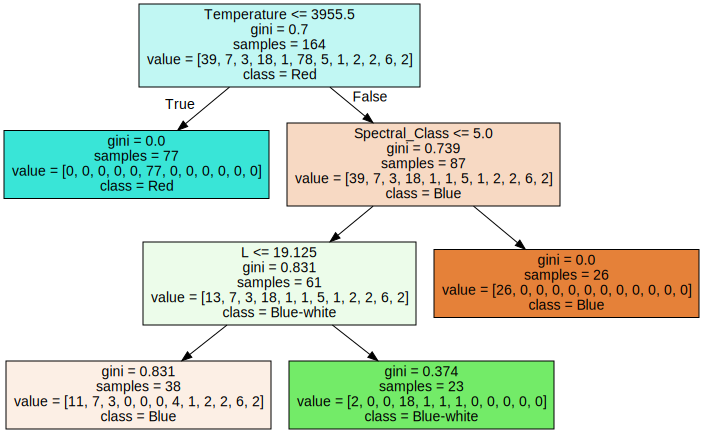

In [ ]:
# modelo construido
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=clf.classes_,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph